In [1]:
import pandas as pd
import quantecon as qe
import warnings
warnings.filterwarnings('ignore')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
fp = "../data/regimed_coffee_prices.csv"
df = pd.read_csv(fp)
select_r8 = (df.regime == "R-8")
dfr8 = df[select_r8].copy().reset_index(drop=True)
del df

In [9]:
dfr8.shape[0]

47

In [10]:
dflearn = dfr8.iloc[:30, :]

In [11]:
dfr8

,date,cents_per_lb,regime,price,previous_price
0,2021-04-01,168.649,R-8,L,NaN
1,2021-05-01,186.463,R-8,L,L
2,2021-06-01,192.065,R-8,L,L
3,2021-07-01,204.501,R-8,L,L
4,2021-08-01,216.435,R-8,M,L
5,2021-09-01,225.537,R-8,M,M
6,2021-10-01,241.073,R-8,M,M
7,2021-11-01,258.978,R-8,M,M
8,2021-12-01,268.329,R-8,H,M
9,2022-01-01,271.081,R-8,H,H


<Axes: >

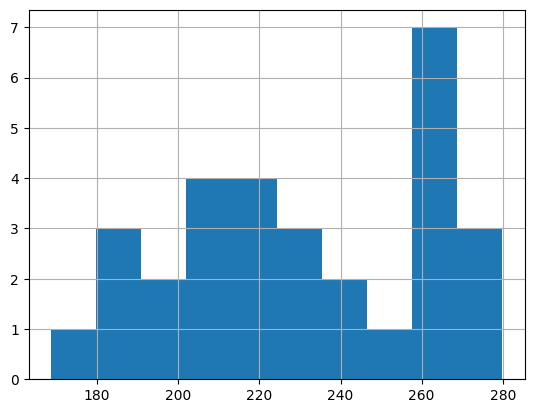

In [5]:
dflearn["cents_per_lb"].hist()

In [7]:

# maintain regime point count to mark the previous price for the first entry in each regime as na
rpc = 0
for ri, row in dflearn.iterrows():
    if rpc == 0 :
        rpc += 1
        continue
    else:
        dflearn.loc[ri, "previous_price"] = dflearn.loc[ (ri -1), "price"]
        rpc += 1

KeyError: 'price'